In [1]:
import numpy as np
from numpy import linalg as LA
import math as m
import os
from matplotlib.image import imread   #behöbdes 
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
import random



## Fig 4.2 in Brunton & Kutz, cost functions

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102
E\infty [ 0.26003662 -0.250113  ]
E_1 [ 0.25714213 -0.05716379]
E_2 [ 0.26000498 -0.18000739]


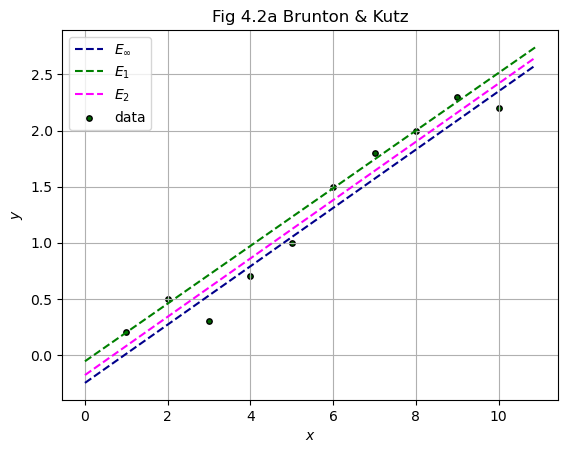

<Figure size 640x480 with 0 Axes>

In [2]:
#Comparison of results using different cost functions

# Function definitions
def fit1(x0,t):
    x,y=t
    return np.max(np.abs(x0[0]*x + x0[1]-y))
def fit2(x0,t):
    x,y=t
    return np.sum(np.abs(x0[0]*x + x0[1]-y))
def fit3(x0,t):
    x,y=t
    return np.sum(np.power(np.abs(x0[0]*x + x0[1]-y),2))

#data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)
x0 = np.array([1,1])

p1 = scipy.optimize.fmin(fit1,x0,args=(t,));
p2 = scipy.optimize.fmin(fit2,x0,args=(t,));
p3 = scipy.optimize.fmin(fit3,x0,args=(t,));

print('E\infty',p1)
print('E_1',p2)
print('E_2',p3)

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)


fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel(r'$x$', fontsize=10)    
ax.set_ylabel(r'$y$')
ax.set_title('Fig 4.2a Brunton & Kutz')
ax.grid(visible=True)
ax.plot(xf, y1, label='$E_\infty$', linestyle='--', color='darkblue') 
ax.plot(xf, y2, label='$E_1$', linestyle='--', color='green') 
ax.plot(xf, y3, label='$E_2$', linestyle='--', color='magenta')
ax.scatter(x, y, s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='data')
ax.legend(loc='best')    
plt.figure()
plt.show()

Optimization terminated successfully.
         Current function value: 1.464330
         Iterations: 52
         Function evaluations: 98
Optimization terminated successfully.
         Current function value: 3.640022
         Iterations: 64
         Function evaluations: 126
Optimization terminated successfully.
         Current function value: 6.234182
         Iterations: 49
         Function evaluations: 92
E\infty [0.27135015 0.95026905]
E_1 [ 0.25997814 -0.05995598]
E_2 [0.20908231 0.3800249 ]


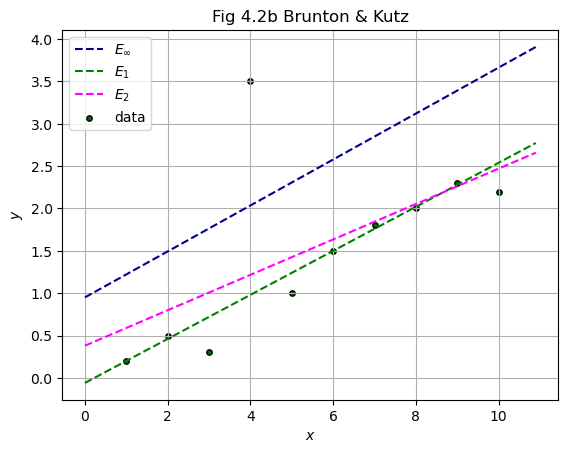

<Figure size 640x480 with 0 Axes>

In [6]:
#add an outlier data point 

# The data
x = np.arange(1,11)
y = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])
t = (x,y)

x0 = np.array([1,1])
p1 = scipy.optimize.fmin(fit1,x0,args=(t,));

p2 = scipy.optimize.fmin(fit2,x0,args=(t,));

p3 = scipy.optimize.fmin(fit3,x0,args=(t,));

print('E\infty',p1)
print('E_1',p2)
print('E_2',p3)

xf = np.arange(0,11,0.1)
y1 = np.polyval(p1,xf)
y2 = np.polyval(p2,xf)
y3 = np.polyval(p3,xf)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel(r'$x$', fontsize=10)    
ax.set_ylabel(r'$y$')
ax.set_title('Fig 4.2b Brunton & Kutz')
ax.grid(visible=True)
ax.plot(xf, y1, label='$E_\infty$', linestyle='--', color='darkblue') 
ax.plot(xf, y2, label='$E_1$', linestyle='--', color='green') 
ax.plot(xf, y3, label='$E_2$', linestyle='--', color='magenta')
ax.scatter(x, y, s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='data')   
ax.legend(loc='best') 
plt.figure()
plt.show()

## Linear regression from Kollmannsberger et al, Exercises for Chap. 2

Define a cost function as in Eq. (2.3) using a linear regression with an
initialization of the weight $w = 1$ and bias $b = 1$. The following data is to be
used.  
$$
x=[0,2,3], \quad y=[1,6,7]
$$

a) Derive the gradient of the cost function w.r.t. the weight $w$ and bias $b$ 

b) Find the minimum of the cost function by using some optimization algorithm from SciPy. Check your result against result from the pseudo-inverse  (see Chapter 1.4 in Brunton et al). 

c) Find the minimum of the cost function and the corresponding weight and bias
by using your own gradient descent Python code. Use the initial weight of $w = 1$, the initial
bias $b = 1$, and a learning rate of $\alpha = 0.1$. Check if your
code converges toward the correct result. 
  



Pseudo inverse: [1.21428571 2.07142857]


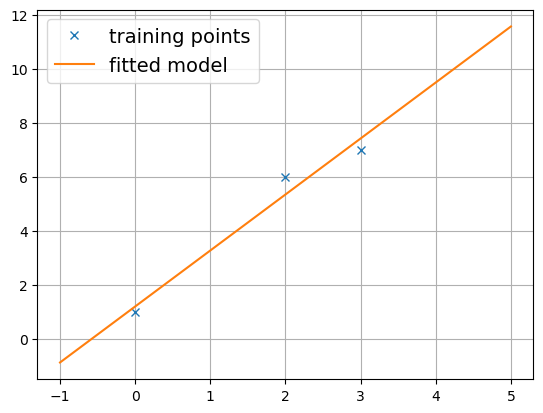

Optimization terminated successfully.
         Current function value: 0.321429
         Iterations: 67
         Function evaluations: 128
N-M: [1.21428572 2.07142857]
Optimization terminated successfully.
         Current function value: 0.321429
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6
BFGS: [1.21428571 2.07142858]


In [3]:
#b)
x=np.array([0,2,3])
y=np.array([1,6,7])
#Solving with pseudo inverse
A=np.array([[1.,x[0]],
            [1.,x[1]],
            [1.,x[2]]]) 
#Pseudo inverse
A_pinv=np.linalg.pinv(A)
d=A_pinv@y
print('Pseudo inverse:',d)


#Solving problem as a nonlinear optimization with SciPy algorithms
def model_fcn(d,x):
    return d[0]+d[1]*x

xx=np.linspace(-1.,5.,100)
fig, ax = plt.subplots()
rcParams["font.size"] = 14
ax.plot(x,y,linestyle='',marker='x',label='training points')
ax.plot(xx,model_fcn(d,xx),linestyle='-',label='fitted model')
ax.legend(loc='best')
ax.grid(visible=True)
plt.show()     


def obj_fcn(d,x,y):
    return 1./2.*np.sum( (y-model_fcn(d,x))*(y-model_fcn(d,x)) )


#initial guess
d0=np.array([1.,1.])

#SciPy, Nelder_Mead. Note: the same method as "scipy.optimize.fmin"
res = minimize(obj_fcn, d0, method='nelder-mead',args=(x,y),
               options={'xatol': 1e-8, 'disp': True})
print('N-M:',res.x)

#SciPy, BFGS, 
res = minimize(obj_fcn, d0, method='BFGS',args=(x,y), 
               options={'disp': True})

print('BFGS:',res.x)


In [4]:
#c)

#define gradient function by numerical differentiation
eps=10**(-6.) #nuerical perturbation
def gradient_num(d, x, y, f, eps):
    num_vars = len(d)
    eye = np.eye(num_vars)
    gradient_vec = np.zeros(num_vars)
    forg = f(d,x,y)  
    for i in range(num_vars):
        d_plus_eps = d + d[i] * eps * eye[i]
        fdiff = f(d_plus_eps, x, y)
        gradient_vec[i] = (fdiff - forg) / (d_plus_eps[i] - d[i])
    return gradient_vec

#own steepest descent
alpha=0.1
#initial guess
d=np.array([1.,1.])

#perform iterations
max_no_iterations=200
for iter in range(max_no_iterations):
        #compute gradient of obj_fcn by numerical differentiation
        grad_pred=gradient_num(d, x, y, obj_fcn, eps)
        d=d-alpha*grad_pred
        if np.sqrt(np.sum(grad_pred*grad_pred))<1.e-3:
            print('convergence after ',iter,'  iterations')
            break
        if iter==199:
            result[kk]=-100
            niter[kk]=-100
print(' Solution d= ',d)


convergence after  55   iterations
 Solution d=  [1.21512232 2.0710811 ]


## Autograd: Automatic Differentiation

In [16]:
import torch

# Create a tensor x with requires_grad=True to indicate we want to compute gradients w.r.t. it
x = torch.tensor(1., requires_grad=True) 

# Define a function y using the tensor x, involving mathematical operations
y = x**2 - 3*x + 4

# Compute the gradient (derivative) of y with respect to x using automatic differentiation
y.backward()

# Access the gradient of y w.r.t. x using x.grad
dy_dx = x.grad
print("Gradient dy/dx:", dy_dx)

# Convert the gradient tensor to a NumPy array using detach() and numpy()
dy_dx_np = dy_dx.detach().numpy()
print("Gradient in NumPy:", dy_dx_np)


Gradient dy/dx: tensor(-1.)
Gradient in NumPy: -1.0


## Use of Autograd in own gradient descent



In [17]:

# Given data
x = torch.tensor([0, 2, 3])
y = torch.tensor([1, 6, 7])

# Model function
def model_fcn(d, x):
    return d[0] + d[1] * x

# Objective function
def obj_fcn(d, x, y):
    return 0.5 * torch.sum((y - model_fcn(d, x))**2)

# Learning rate
alpha = 0.1

# Initial guess as a numpy array
previous_d_np = np.array([1., 1.])

# Maximum number of iterations
max_no_iterations = 200

# Iterate to optimize the parameters
for iter in range(max_no_iterations):
    # Convert the numpy array to a torch tensor with gradient tracking
    previous_d = torch.tensor(previous_d_np, requires_grad=True)
    
    # Calculate the objective function value
    current_obj_fcn = obj_fcn(previous_d, x, y)
    
    # Compute gradients using automatic differentiation
    current_obj_fcn.backward()
    grad_obj_fcn = previous_d.grad
    
    # Update parameters using gradient descent
    previous_d = previous_d - alpha * grad_obj_fcn
    
    # Reset gradients for the next iteration
    previous_d.grad = None
    
    # Convert back to a numpy array
    previous_d_np = previous_d.detach().numpy()
    #grad_np = grad_obj_fcn.detach().numpy()
    
    # Check for convergence based on gradient magnitude
    if torch.sum(grad_obj_fcn * grad_obj_fcn) < 10**(-3):
        print('Convergence')
        break
    elif iter == (max_no_iterations - 1):
        print('No convergence')
        break

# Print the results
print('Iter =', iter, 'Objective =', current_obj_fcn.detach().numpy(), 'd =', previous_d.detach().numpy())



Convergence
Iter = 19 Objective = 0.32194240780133204 d = [1.24215983 2.05988127]


## Use of PyTorch optimization

Including automatic differentiation

In [23]:
#solution with pytorch optimizer
from torch.optim import Adagrad

initial_d=np.array([1.,1.])
#Solution with torch and Adagrad
d = torch.tensor(initial_d, requires_grad=True)
optimizer = Adagrad([x], lr=0.02)  
# Convergence criterion
threshold = 1e-7

# Convergence criterion
threshold = 1e-5

# Perform optimization
prev_d = d.clone().detach()
iteration = 0

num_iterations=10000
prev_loss=1.e10

while True:
    # Clear gradients
    optimizer.zero_grad()

    # Evaluate the function
    loss = obj_fcn(d,x,y)

    # Compute gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    ## Check convergence criterion
    d_d=d.detach().numpy() - prev_d.detach().numpy()
    if np.sqrt( np.sum(d_d*d_d) ) < threshold : 
        print('Change of optimization variables d_d is small than threshold')
        break

    # Update previous parameter values
    prev_d = d.clone().detach()
    prev_loss=loss
    iteration += 1

    if iteration >= num_iterations:
        print('too many iterations')
        break

# Print the final optimized values
print("Optimized values:")
print("d =", d)

Change of optimization variables d_d is small than threshold
Optimized values:
d = tensor([1., 1.], dtype=torch.float64, requires_grad=True)


In [5]:
#Not included in the course

observed_data = np.array([2.1, 3.0, 4.2, 5.7, 6.8])
predicted_values = np.array([2.0, 3.1, 4.0, 5.5, 6.9])
num_parameters = 2

def aic_score(observed_data,predicted_values,num_parameters):
    # Simulated data and model predictions
    #observed_data = np.array([2.1, 3.0, 4.2, 5.7, 6.8])
    #predicted_values = np.array([2.0, 3.1, 4.0, 5.5, 6.9])

    # Number of parameters in the model (including intercept)
    #num_parameters = 2  # For example, slope and intercept

    # Compute the residuals
    residuals = observed_data - predicted_values
    # Calculate the sum of squared residuals
    rss = np.sum(residuals ** 2)

    # Calculate the AIC score
    n = len(observed_data)  # Number of data points
    return n * np.log(rss / n) + 2 * num_parameters

print("AIC Score:", aic_score(observed_data,predicted_values,num_parameters))

AIC Score: -15.083564128119093


## Example, regularization

Optimization terminated successfully.
         Current function value: 2.283928
         Iterations: 36
         Function evaluations: 364
         Gradient evaluations: 52
[ 6.46571843e+02 -1.20763547e+03  7.43492953e+02 -1.84197324e+02
  1.95164497e+01 -7.40051315e-01]


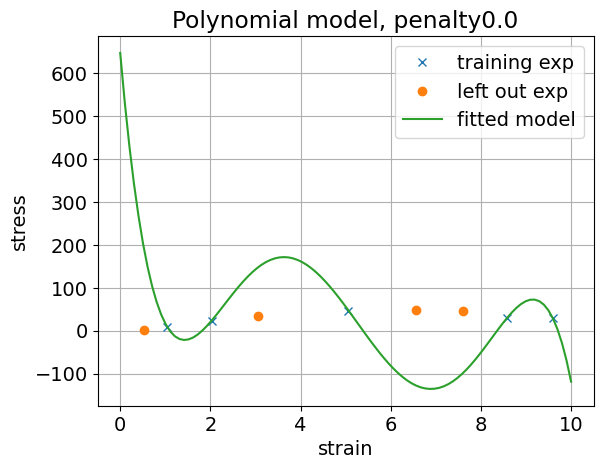

         Current function value: 126.605369
         Iterations: 34
         Function evaluations: 936
         Gradient evaluations: 132
[-1.02747594e-09  4.82987432e+00  5.98801376e+00 -1.56419879e+00
  1.23783035e-01 -2.90859925e-03]


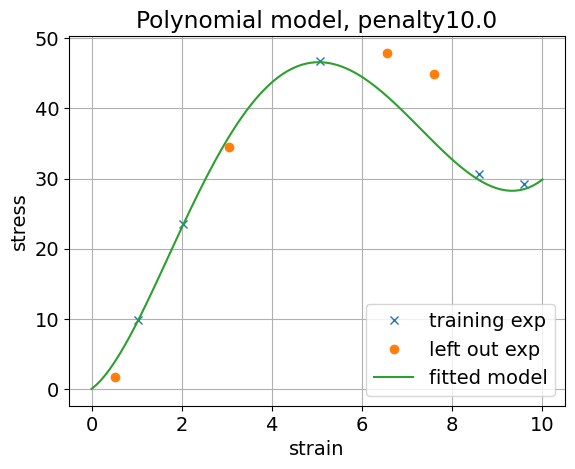

Optimization terminated successfully.
         Current function value: 994.929427
         Iterations: 44
         Function evaluations: 700
         Gradient evaluations: 100
[-7.40674430e-09  7.80182362e+00  1.53250189e+00 -2.25165379e-02
 -6.87753742e-02  5.11119185e-03]


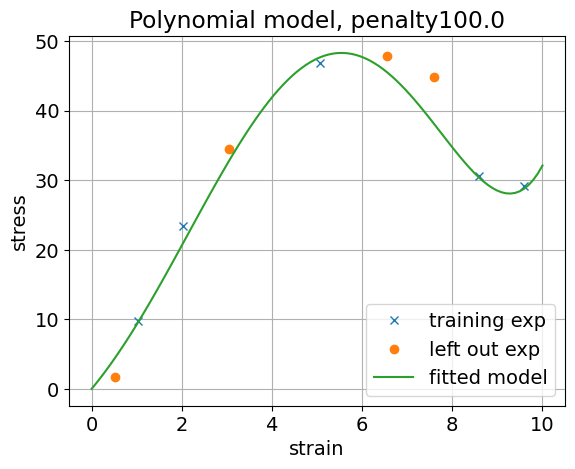

Optimization terminated successfully.
         Current function value: 8424.784670
         Iterations: 37
         Function evaluations: 413
         Gradient evaluations: 59
[ 4.02634718e-03  5.22150107e+00  2.27457076e+00 -5.71939019e-04
 -8.74956580e-02  6.29138655e-03]


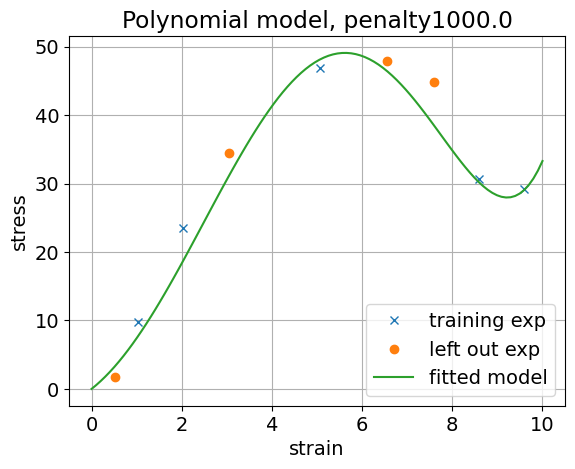

In [72]:
#Load data from .mat file, example
mat_file=sio.loadmat('example27.mat')
testdata=mat_file['example27']  
xtest=testdata[:,0] 
ytest=testdata[:,1] 

mat_file=sio.loadmat('example27train.mat')
traindata=mat_file['example27train']
xdata=traindata[:,0] 
ydata=traindata[:,1] 

def polynom_model(xdata,kappa):
    return kappa[0]+kappa[1]*xdata+kappa[2]*xdata**2.+kappa[3]*xdata**3.+kappa[4]*xdata**4.+kappa[5]*xdata**5.

def objective_fcn(kappa,ydata,xdata,penalty):
    return np.square( np.sum( ((ydata-polynom_model(xdata,kappa))**2.) ) )+penalty*np.sum( np.abs(kappa) )

kappa0=np.zeros(6)
def plot_res_fcn(penalty):
    #see settings: https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html
    res = minimize(objective_fcn, kappa0, method='BFGS',args=(ydata,xdata,penalty),
               options={'maxiter':2000,'gtol':1.e-3,'xrtol':1.e-3,'disp': True})
    #print(res.x)
    kappa=np.array(res.x)
    print(kappa)

    fig, ax = plt.subplots()
    rcParams["font.size"] = 14
    ax.plot(xdata,ydata,linestyle='',marker='x',label='training exp')
    ax.plot(xtest,ytest,linestyle='',marker='o',label='left out exp')

    xplot=np.linspace(0.,10.,100)
    ax.plot(xplot,polynom_model(xplot,kappa),linestyle='-',label='fitted model')
    ax.set_xlabel('strain')
    ax.set_ylabel('stress')
    ax.legend(loc='best')
    ax.grid(visible=True)
    ax.set_title(r'Polynomial model, penalty'+str(penalty))
    plt.show()             

plot_res_fcn(0.)       

plot_res_fcn(10.)

plot_res_fcn(100.)  

plot_res_fcn(1000.)  


## Example on lecture

Assume a model in the following form:  
$$
y=\sum_{i=0}^p w_i \, x^i 
$$
where $p$ is the polynomial degree. 

a) Assume the experimental data defined by the parabola $y=x^2$ together with some noise. Assume the noise in normally random distributed with zero mean and deviation 0.1. Determine the coefficient $w_i$ for $p=8$ when $0 \leq x \leq 4$ for 4 realizations of the random noise. Compare the obtained coefficients for these realizations.    
b) Apply the lasso regularization and the gradient descent method. Solve the same problem as in a) but try with different values of the regularization parameter.

Compare your results with Brunton et al. Figure 4.14.

an= [-0.1035813   0.98281745 -1.66447909  3.31788081 -2.18473323  0.78148385
 -0.14293449  0.01044103]
an= [-8.00731573e-03 -7.14561760e-02  1.00461504e+00  1.05782787e-01
 -6.68007993e-02  1.06098688e-02  1.16822584e-03 -3.13291348e-04]
an= [-0.03053193  0.14762983  0.91535994 -0.30910862  0.44264804 -0.2240659
  0.04946659 -0.00402075]
an= [-0.09747059  0.6242959  -0.47504577  1.77373047 -1.16963768  0.423258
 -0.07860499  0.00584382]


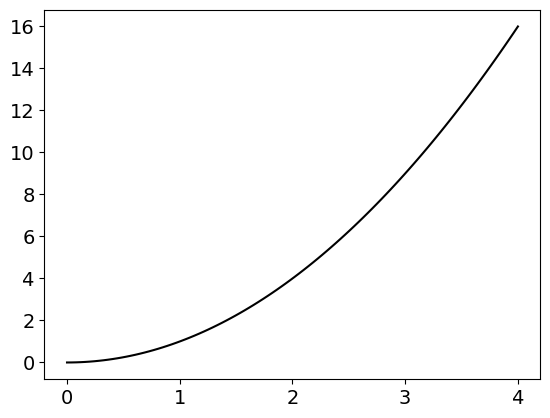

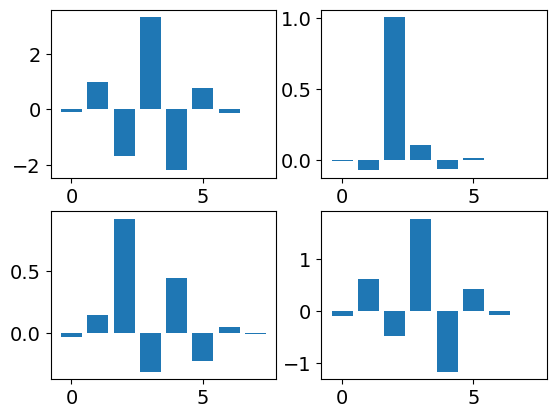

In [73]:
#assume parabola
n = 100 #number of experimental points
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2) # Parabola with 100 data points

M = 8 # Polynomial degree

A = np.zeros((n,M))
for j in range(M):
    A[:,j] = np.power(x,j) # Build matrix A

def polynom_model_fcn(x,kappa):
    res=0.
    for j in range(len(kappa)):
        res=res+kappa[j]*x**j
    return res

plt.figure()
plt.plot(x,f,color='k')
    
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

#4 different randomizations
for j in range(4):
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    an = np.linalg.pinv(A) @ fn # Least-square fit using pseudo inverse
    print('an=',an)
    fna = A @ an 
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    axs[j].bar(range(len(an)),an)

plt.show()

## Code for selection of data points (useful in cross-validation procedure)

In [1]:
import numpy as np

# Initialize an empty list to store all combinations
all_combinations = []

# Recursive function to generate all combinations of data points with certain count left out
def generate_combinations(data_points, leave_out_count, start, comb=[]):
    # Base case: if the combination length matches the desired leave_out_count
    if len(comb) == len(data_points) - leave_out_count:
        all_combinations.append(comb)  # Add this combination to the list
        return
    # Generate combinations recursively
    for i in range(start, len(data_points)):
        generate_combinations(data_points, leave_out_count, i + 1, comb + [data_points[i]])

# Function to generate left out points and remaining points combinations
def left_out_points_fcn(data_points, leave_out_count):
    generate_combinations(data_points, leave_out_count, 0)
    
    # Initialize lists to store left out points and remaining points
    left_out_points = []
    
    # Iterate through combinations and find left out points
    for combination in all_combinations:
        left_out_points.append(np.setdiff1d(data_points, combination))
    
    return np.array(left_out_points), np.array(all_combinations)

# Example of usage:
# List of 5 data points
data_points = np.array([1, 2, 4, 5,9])
# Number of data points to leave out
leave_out_count = 2
# Get left out points and remaining points combinations
left_out_points, remaining_points = left_out_points_fcn(data_points, leave_out_count)

# Print the results
print("Left Out Points:\n", left_out_points)
print("\nRemaining Points Combinations:\n", remaining_points)


Left Out Points:
 [[5 9]
 [4 9]
 [4 5]
 [2 9]
 [2 5]
 [2 4]
 [1 9]
 [1 5]
 [1 4]
 [1 2]]

Remaining Points Combinations:
 [[1 2 4]
 [1 2 5]
 [1 2 9]
 [1 4 5]
 [1 4 9]
 [1 5 9]
 [2 4 5]
 [2 4 9]
 [2 5 9]
 [4 5 9]]
